<a href="https://colab.research.google.com/github/sivasriharshapulipati/FeynnLabs_Market_Segmentation/blob/main/FeynnLabs_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORING THE MCDONALDS DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture

**Step 2:Exploring the dataset**

In [ ]:
mcdonalds=pd.read_csv('Downloads/mcdonalds.csv')
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
mcdonalds.info()
mcdonalds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


(1453, 15)

In [ ]:
mcdonalds['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

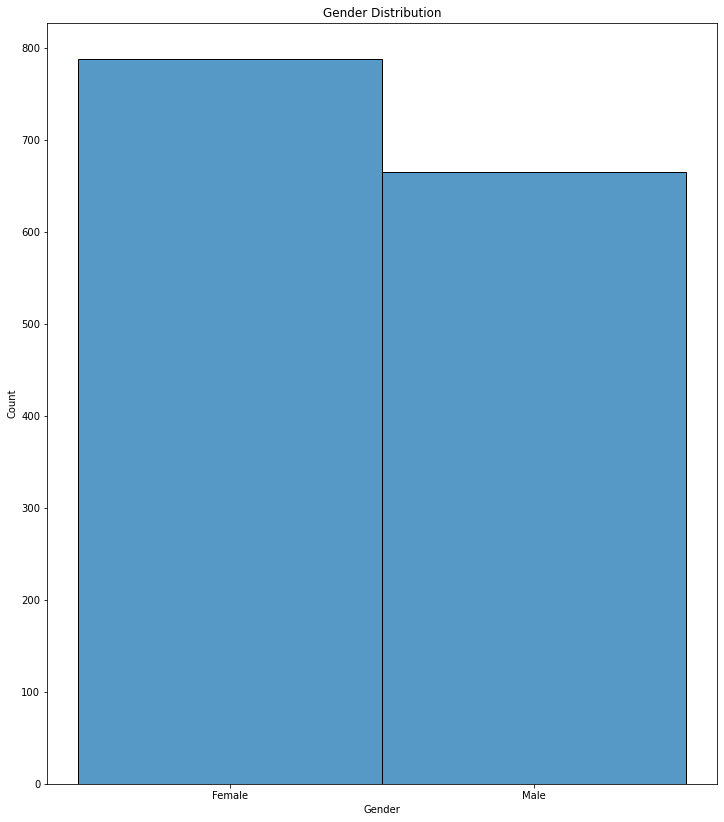

In [ ]:
plt.rcParams['figure.figsize'] = (12,14)
datahist=sns.histplot(x=mcdonalds['Gender'])
plt.title("Gender Distribution")
plt.show()

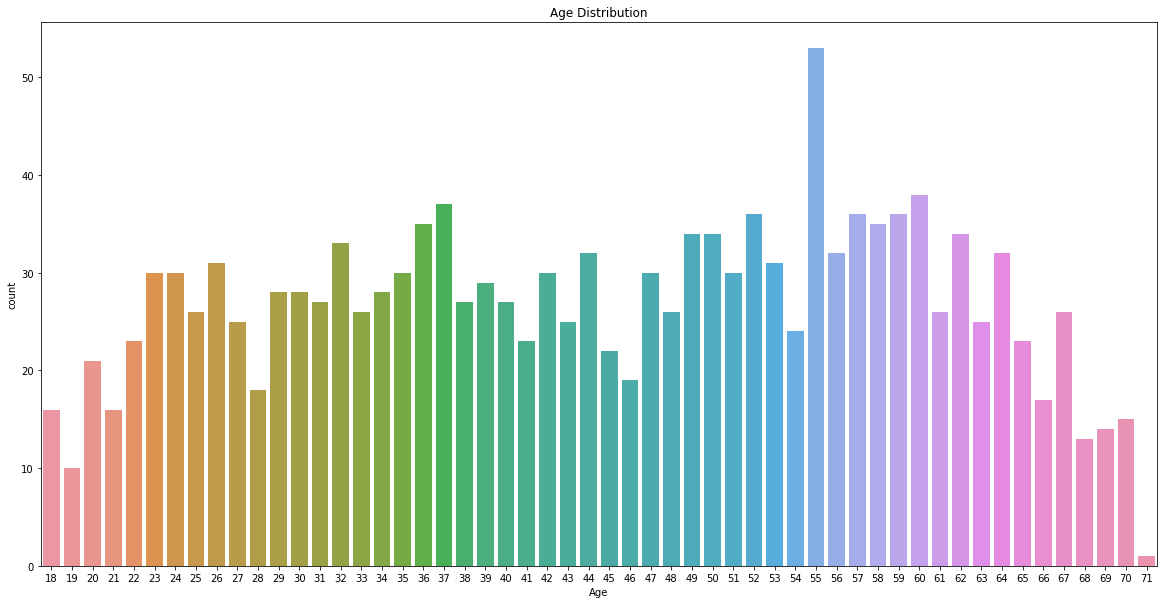

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
agedist=sns.countplot(x=mcdonalds['Age'])
plt.title("Age Distribution")
plt.show()

In [ ]:
def label(x):
    mcdonalds[x] = LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds
category = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for i in category:
    label(i)
mcdonalds_split= mcdonalds.columns[:11]
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [ ]:
avg_values = np.round(mcdonalds[mcdonalds_split].mean(), 2)
print(avg_values)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
MD_x = mcdonalds[mcdonalds_split].values
MD_pca = PCA()
MD_pca.fit(MD_x)

PCA()

In [ ]:
explained_variance_ratio = MD_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
summary_data = {
    'Standard deviation': np.round(np.sqrt(MD_pca.explained_variance_), 4),
    'Proportion of Variance': np.round(explained_variance_ratio, 4),
    'Cumulative Proportion': np.round(cumulative_variance, 5)
}
summary_df = pd.DataFrame(summary_data, index=['PC{}'.format(i+1) for i in range(len(explained_variance_ratio))])
summary_df

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.7570,0.2994,0.29945
PC2,0.6075,0.1928,0.49224
PC3,0.5046,0.1330,0.62529
PC4,0.3988,0.0831,0.70839
PC5,0.3374,0.0595,0.76787
PC6,0.3103,0.0503,0.81817
PC7,0.2897,0.0438,0.86201
PC8,0.2751,0.0395,0.90156
PC9,0.2653,0.0368,0.93832
PC10,0.2488,0.0324,0.97068


In [ ]:
print("Factor Loadings:")
print(pd.DataFrame(MD_pca.components_, columns=mcdonalds_split))

Factor Loadings:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.008707  0.239532  0.428087   
10  0.045439   -0.541616  0.141730   0.250910  0.001642  0.339265 -0.489283   

       tasty  expensive   healthy 

In [ ]:
rotation_matrix = MD_pca.components_.T
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
loadings_df = pd.DataFrame(rotation_matrix, columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])], index=features)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


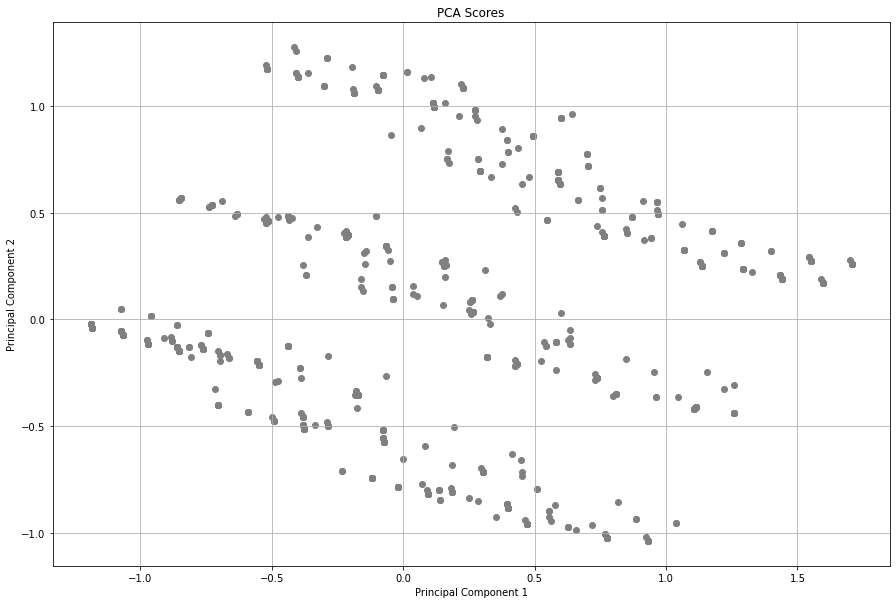

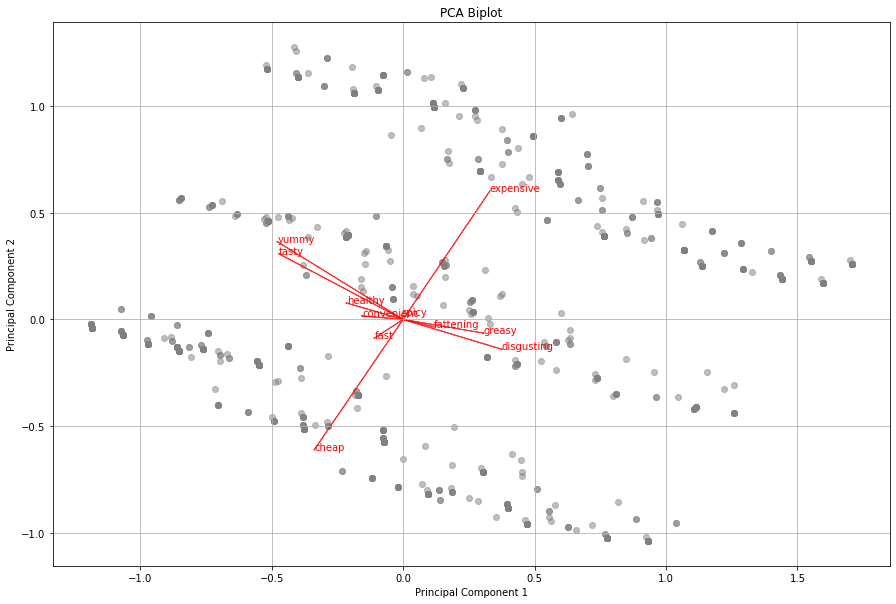

In [ ]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scores')
plt.grid(True)
plt.show()
loadings = pca.components_.T
features=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
# Biplot visualization
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.75)
    plt.text(loadings[i, 0], loadings[i, 1], feature, color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()

**Extracting Segments**

In [ ]:
like_mapping = {
    'I love it!+5': 5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4,
    'I hate it!-5': -5
}
mcdonalds['LikeNew'] = mcdonalds['Like'].map(like_mapping)


In [ ]:
McdX= mcdonalds.iloc[:, 1:11]
McdX['LikeNew'] = mcdonalds['LikeNew']
McdX

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,LikeNew
0,1,0,1,0,1,1,0,1,0,0,-3
1,1,0,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,0,1,1,1,0,1
3,1,0,1,1,1,1,1,0,0,1,4
4,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,1,0,0,0,1,0,1,-5
1449,1,0,1,0,0,1,1,0,1,0,2
1450,1,0,1,0,1,0,1,1,0,0,3
1451,1,0,0,0,1,1,1,0,1,0,4


In [ ]:
scaler = StandardScaler()
McdX_scaled = scaler.fit_transform(McdX)

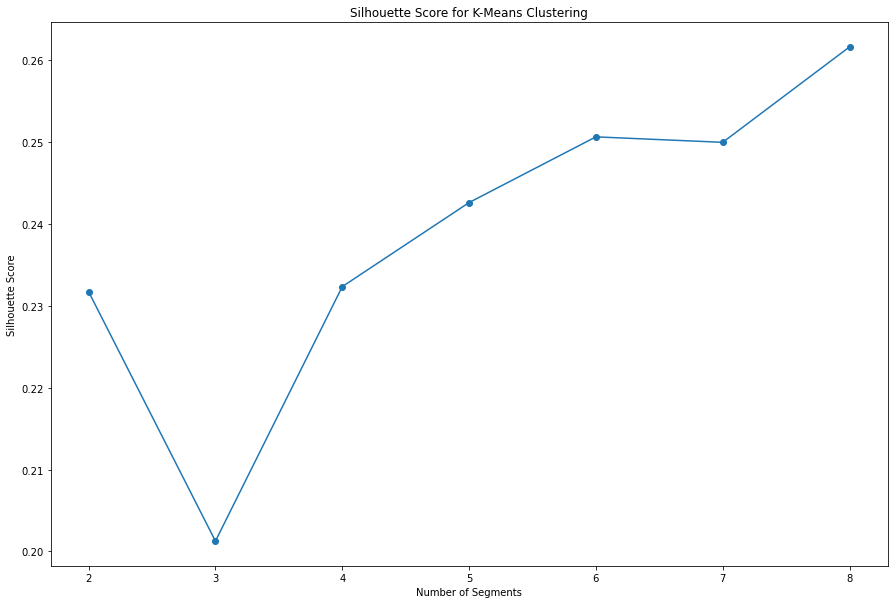

(1453, 11)

In [ ]:
clusters_range = range(2, 9)
silhouette_scores = []

for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(McdX_scaled)
    silhouette_scores.append(silhouette_score(McdX_scaled, cluster_labels))
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means Clustering")
plt.show()
McdX_scaled.shape

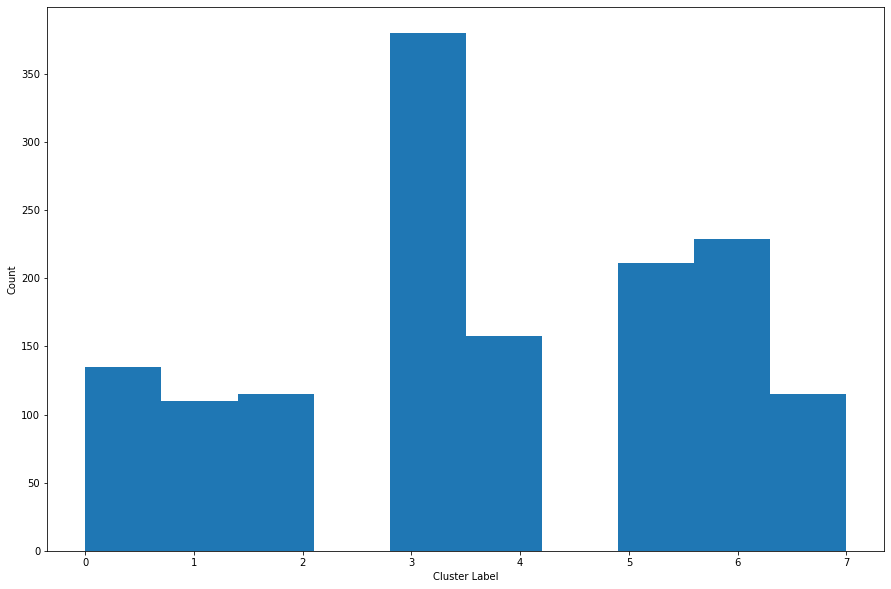

In [ ]:
kmeans = KMeans(n_clusters=8, n_init=10, random_state=1234)
# Perform clustering
kmeans.fit(McdX_scaled)
# Get the cluster labels
data_predict = kmeans.labels_
plt.figure()
plt.hist(data_predict)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

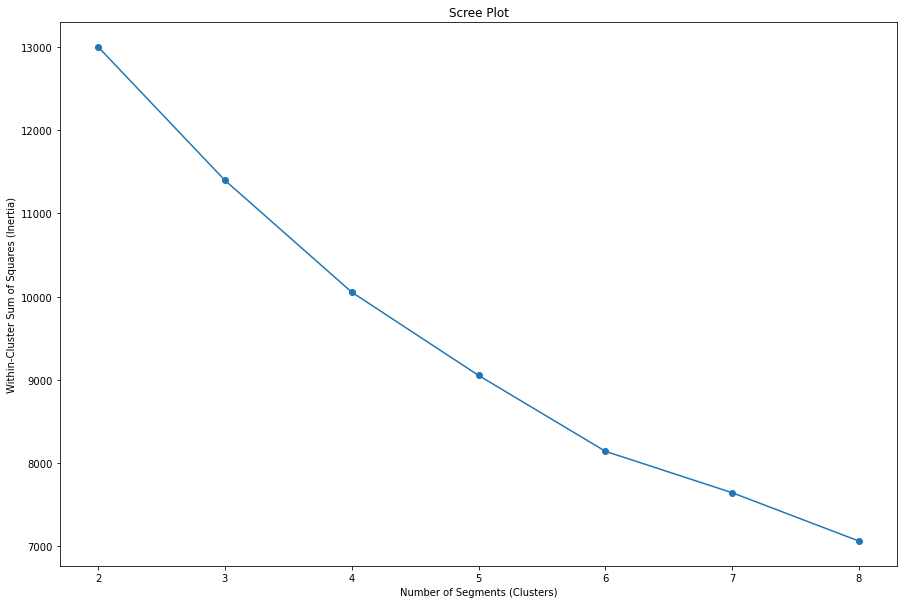

In [ ]:
inertia_values = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(McdX_scaled)
    inertia_values.append(kmeans.inertia_)
# Create the scree plot
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Scree Plot')
plt.show()

In [ ]:
from sklearn.utils import resample
cluster_results = []

# Number of bootstrap iterations
n_bootstrap = 100

# Range of clusters (2 to 8) as in the original R code
num_clusters_range = range(2, 9)

# Bootstrap loop
for i in range(n_bootstrap):
    # Perform bootstrap resampling
    McdX_bootstrapped = resample(McdX_scaled, random_state=i, replace=True)

    # Standardize the bootstrapped data
    scaler = StandardScaler()
    McdX_bootstrapped_standardized = scaler.fit_transform(McdX_bootstrapped)

    # Initialize a dictionary to store clustering results for this bootstrap iteration
    bootstrap_results = {}

    # Perform clustering for each number of clusters
    for k in num_clusters_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=i)
        kmeans.fit(McdX_bootstrapped_standardized)
        bootstrap_results[k] = kmeans.labels_

    # Store the clustering results for this bootstrap iteration
    cluster_results.append(bootstrap_results)

print("Cluster labels for the first bootstrap iteration:")
print(cluster_results[0])


Cluster labels for the first bootstrap iteration:
{2: array([0, 0, 0, ..., 0, 1, 0]), 3: array([0, 0, 1, ..., 0, 2, 0]), 4: array([1, 1, 3, ..., 1, 2, 1]), 5: array([4, 4, 4, ..., 4, 2, 4]), 6: array([1, 4, 4, ..., 1, 1, 4]), 7: array([0, 1, 0, ..., 2, 6, 1]), 8: array([3, 1, 1, ..., 3, 6, 1])}


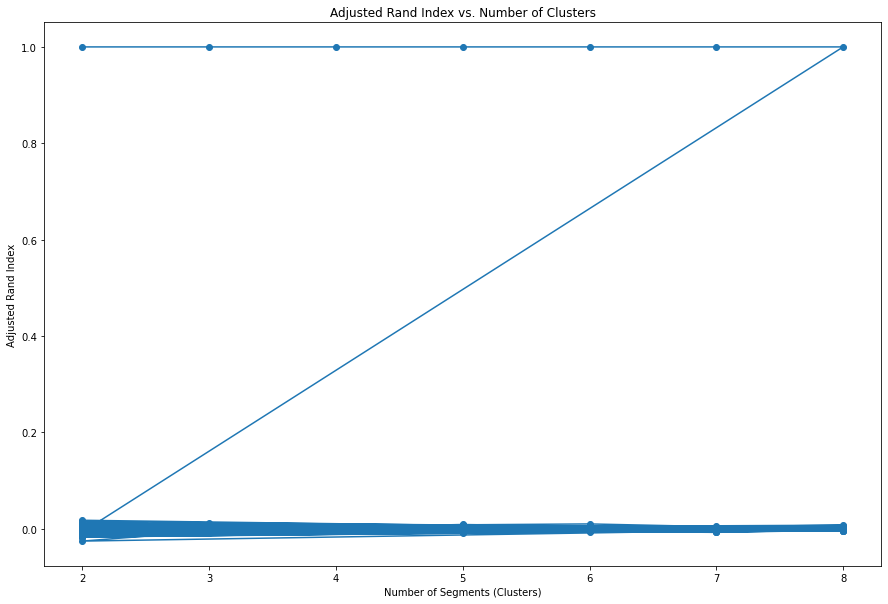

In [ ]:
adjusted_rand_indices = []
adjusted_rand_index_list = []
for result in cluster_results:
    for k, labels in result.items():
        true_labels = cluster_results[0][k]  # Use the first clustering result as true labels for comparison
        adjusted_rand_index = adjusted_rand_score(true_labels, labels)
        adjusted_rand_indices.append((k, adjusted_rand_index))
        adjusted_rand_index_list.append(adjusted_rand_indices)

# Separate the results for plotting
num_clusters, aris = zip(*adjusted_rand_indices)

# Create the plot
plt.plot(num_clusters, aris, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Clusters')
plt.show()


In [ ]:
mcdonalds_k4 = McdX_scaled[np.array(data_predict) == 3]
mcdonalds_k4

array([[ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
        -0.56648839,  0.39251521],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
         1.76526126,  1.03441123],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
        -0.56648839,  0.39251521],
       ...,
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
         1.76526126,  1.03441123],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
        -0.56648839,  0.39251521],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -0.49827882,
         1.76526126,  0.07156721]])

In [ ]:
scaler = StandardScaler()
mcdonalds_x_standardized = scaler.fit_transform(McdX_scaled)

MD_k4 = data_predict

mcdonals_k4 = mcdonalds_x_standardized[np.array(MD_k4) == 1]

# Initialize the Gaussian Mixture Model with one component (you can change this as needed)
num_components = 1
gmm_model = GaussianMixture(n_components=num_components, random_state=1234)

# Fit the Gaussian Mixture Model to the data points in cluster 4
gmm_model.fit(mcdonals_k4)

# Get the responsibilities (probabilities of each data point belonging to each component)
responsibilities = gmm_model.predict_proba(mcdonals_k4)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


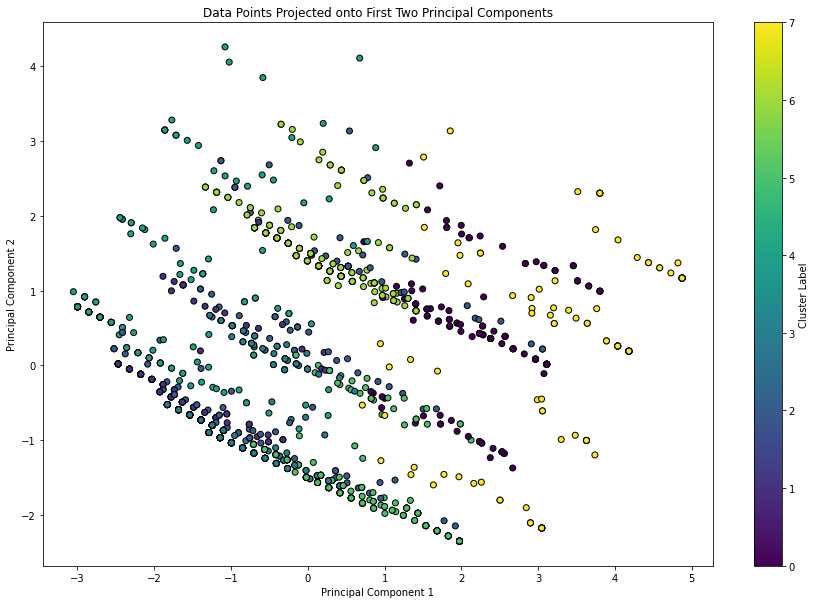

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
MD_pca = pca.fit_transform(McdX_scaled)


# Create the scatter plot of the data points projected onto the first two principal components
plt.figure()
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points Projected onto First Two Principal Components')
plt.colorbar(label='Cluster Label')
plt.show()

**Describing Segments**

<Figure size 576x432 with 0 Axes>

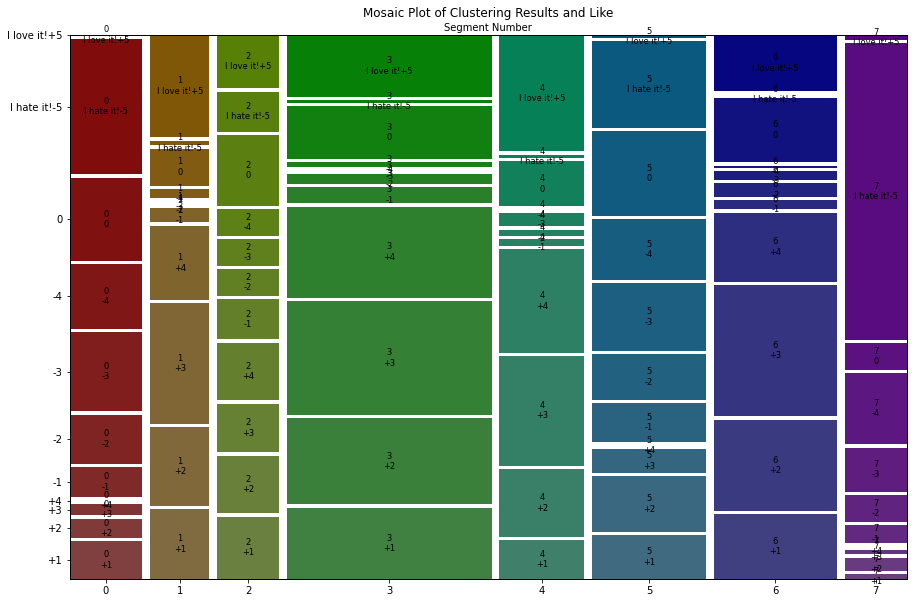

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
cluster_data = pd.DataFrame({'Cluster': MD_k4, 'Like': mcdonalds['Like']})

# Create a two-way contingency table using crosstab
contingency_table = pd.crosstab(cluster_data['Cluster'], cluster_data['Like'])

# Create the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), gap=0.01, title='Mosaic Plot of Clustering Results and Like')
plt.xlabel('Segment Number')
plt.show()


<AxesSubplot:xlabel='k4', ylabel='Age'>

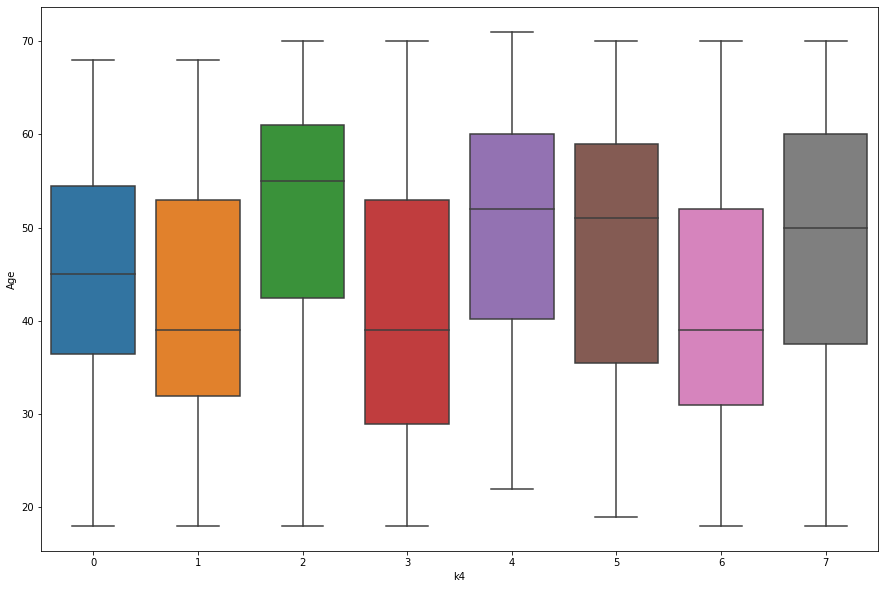

In [ ]:
sns.boxplot(x="k4", y="Age", data=mcdonalds)

In [ ]:
mcdonalds['k4'] = MD_k4

# Mapping of visit frequencies to numerical values
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 12,
    'Every three months': 4,
    'Once a week': 52,
    'More than once a week': 104,
}

# Convert the 'VisitFrequency' column to numeric based on the mapping
mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].map(visit_frequency_mapping)

# Calculate the mean visit frequency for each cluster
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()

print(visit)

k4
0     7.311111
1    24.318182
2    18.086957
3    21.789474
4    23.772152
5     7.763033
6    21.323144
7     3.695652
Name: VisitFrequency, dtype: float64


In [ ]:
like = mcdonalds.groupby('k4')['LikeNew'].mean()
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == "Female").mean())

**Target Segments**

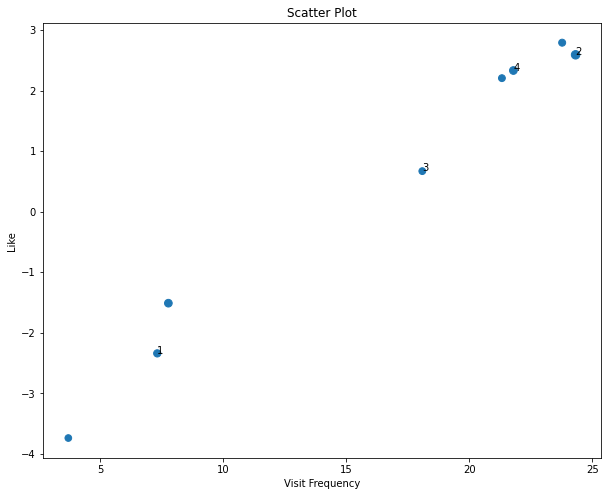

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(visit, like, s=100 * female)
for i in range(1, 5):
    plt.text(visit[i-1], like[i-1], str(i))
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Scatter Plot')
plt.show()